Инициализация библиотек для ETL и EDA, а также для кластеризации

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from scipy.stats import skew, norm
import scipy.stats as stats
from scipy.stats import norm
from sklearn.cluster import KMeans

import warnings

warnings.filterwarnings(action="ignore")

Загрузка данных и вывод первых пяти строк

In [2]:
data = pd.read_csv('data_3.csv')
df = data.copy()
df.head()

,Unnamed: 0.1,Unnamed: 0,price,rooms,area,kitchen_area,floor,renovation,deal_type,balcony,...,latitude,longitude,wall_material_Блочный,wall_material_Железобетон,wall_material_Кирпично-монолитный,wall_material_Кирпичный,wall_material_Монолитно-кирпичный,wall_material_Монолитный,wall_material_Панельный,wall_material_Смешанные
0,0,0,4500000,1.0,22.6,3.0,3.0,1,1,0,...,43.122565,131.907848,False,False,False,False,False,False,True,False
1,1,1,10000000,3.0,75.4,5.0,6.0,1,1,0,...,43.118957,131.968481,False,False,False,False,False,True,False,False
2,2,2,6650000,1.0,31.6,5.0,2.0,0,0,0,...,43.183735,131.925201,False,False,False,True,False,False,False,False
3,3,3,11000000,2.0,47.0,3.1,6.0,0,0,1,...,43.086209,131.854930,False,False,False,False,False,True,False,False
4,4,4,4900000,1.0,24.1,3.0,16.0,0,0,0,...,43.118827,131.970732,False,False,False,False,False,True,False,False


Просмотр основной информации по строкам

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0.1                       120 non-null    int64  
 1   Unnamed: 0                         120 non-null    int64  
 2   price                              120 non-null    int64  
 3   rooms                              101 non-null    float64
 4   area                               107 non-null    float64
 5   kitchen_area                       89 non-null     float64
 6   floor                              107 non-null    float64
 7   renovation                         120 non-null    int64  
 8   deal_type                          120 non-null    int64  
 9   balcony                            120 non-null    int64  
 10  trash_chute                        83 non-null     float64
 11  Год постройки                      107 non-null    float64

Удаление колонок с наибольшим количеством значений NaN и очевидно плохих признаков

In [5]:
too_much_na_columns = ['Жилая', 'number_of_owners', 'Теплоснабжение','number_of_elevators', 'energy_efficiency_class','gas_supply', 'freight_elevator', 'ventilation', 'number_of_owners', 'power_supply', 'Количество подъездов', 'years_in_ownership', 'Водоотведение', 'Водоотведение', 'gas_supply']
df.drop(columns=too_much_na_columns, inplace=True)

columns_to_remove = ['Unnamed: 0', 'Unnamed: 0.1', 'Серия дома']
df.drop(columns=[col for col in columns_to_remove if col in df.columns], inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   price                              120 non-null    int64  
 1   rooms                              101 non-null    float64
 2   area                               107 non-null    float64
 3   kitchen_area                       89 non-null     float64
 4   floor                              107 non-null    float64
 5   renovation                         120 non-null    int64  
 6   deal_type                          120 non-null    int64  
 7   balcony                            120 non-null    int64  
 8   trash_chute                        83 non-null     float64
 9   Год постройки                      107 non-null    float64
 10  Количество этажей                  116 non-null    float64
 11  Лифт                               48 non-null     float64

Заполнение значений NaN: медианой для числовых данных и модальным значением для категориальных

In [7]:
medians = df.select_dtypes(include='number').median()
df.fillna(value=medians, inplace=True)

modes = df.select_dtypes(include='object').mode().iloc[0]
df.fillna(value=modes, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   price                              120 non-null    int64  
 1   rooms                              120 non-null    float64
 2   area                               120 non-null    float64
 3   kitchen_area                       120 non-null    float64
 4   floor                              120 non-null    float64
 5   renovation                         120 non-null    int64  
 6   deal_type                          120 non-null    int64  
 7   balcony                            120 non-null    int64  
 8   trash_chute                        120 non-null    float64
 9   Год постройки                      120 non-null    float64
 10  Количество этажей                  120 non-null    float64
 11  Лифт                               120 non-null    float64

Логарифмирование цены дома

In [8]:
df['price'] = np.log1p(df['price'])

Очистка координат от выборосов

In [9]:
df = df[df['longitude'] > 100]

Создание набора координат

In [10]:
co = {
    'latitude': df['latitude'],
    'longitude': df['longitude']
}

array = pd.DataFrame(co).dropna()
print(array)

      latitude   longitude
0    43.122565  131.907848
1    43.118957  131.968481
2    43.183735  131.925201
3    43.086209  131.854930
4    43.118827  131.970732
..         ...         ...
115  43.232924  132.012663
116  43.075123  131.962042
117  43.092071  131.961957
118  43.112997  131.933747
119  43.125537  131.931541

[119 rows x 2 columns]


Визуализация домов на "карте"

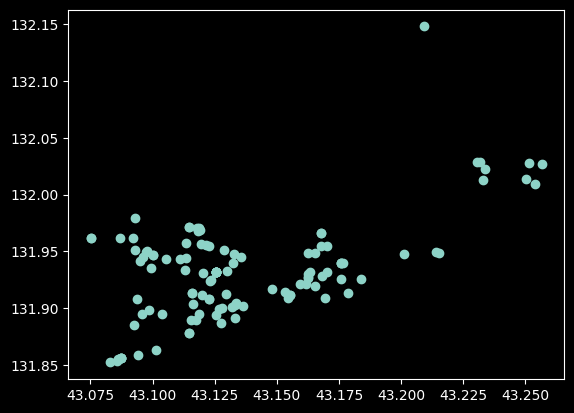

In [11]:
plt.scatter(array['latitude'], array['longitude'], label='True Position')

Инициализация модели кластеризации по к-ближайшим

In [57]:
kmeans = KMeans(n_clusters=3, algorithm='lloyd')
kmeans.fit(array)

KMeans(n_clusters=3)

In [58]:
print(kmeans.cluster_centers_)

[[ 43.12057498 131.89321908]
 [ 43.19401759 131.96776961]
 [ 43.11321247 131.94728572]]


Визуализация кластеров на "карте"

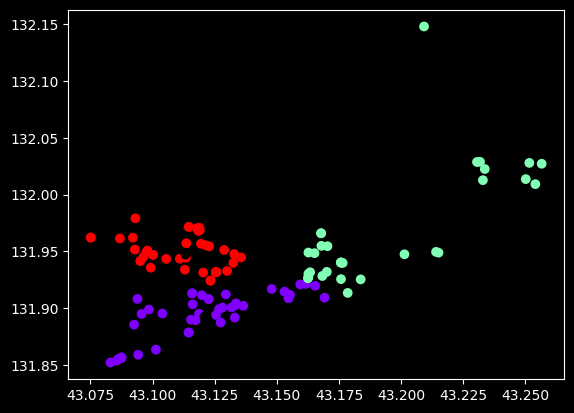

In [59]:
plt.scatter(array['latitude'],array['longitude'], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

Добавление колонки, означающая кластер дома

In [60]:
df['cluster'] = kmeans.fit_predict(array)

In [61]:
df['cluster'] = df['cluster'].astype('object')

In [62]:
too_much_na_columns = ['latitude', 'longitude']
df.drop(columns=too_much_na_columns, inplace=True)

KeyError: "['latitude', 'longitude'] not found in axis"

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import resample

In [64]:
X = df.drop(['price'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, y_train = resample(X_train, y_train, n_samples=len(X_train) * 3, random_state=42)


In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [66]:
rf_model = RandomForestRegressor()

In [67]:
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features = [feat for feat in numerical_features if feat not in categorical_features]

In [68]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

In [69]:
rf_param_grid = {
    'model__n_estimators': [20, 50, 100, 200, 300],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

In [70]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', rf_model)
])

In [71]:
rf_search = RandomizedSearchCV(rf_pipeline, rf_param_grid, n_iter=10, cv=3, verbose=1, random_state=42)
rf_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['rooms',
                                                                                'area',
                                                                                'kitchen_area',
                                                                                'floor',
                                                                                'renovation',
                                                                                'deal_type',
                                                                                'balcony',
                                                                                'trash_chute',
                                                                                'Год '
                                                                                'постройки',
                                                                                'Количество '
                                                                                'этажей',
                                                                                'Лифт',
                                                                                'Количество '
                                                                                'балконов',
                                                                                'Количество '
                                                                                'квартир']),
                                                                              ('cat',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['...
                                                                                'фундамента',
                                                                                'Горячее '
                                                                                'водоснабжение',
                                                                                'Холодное '
                                                                                'водоснабжение',
                                                                                'cluster'])])),
                                             ('model',
                                              RandomForestRegressor())]),
                   param_distributions={'model__max_depth': [None, 10, 20, 30],
                                        'model__max_features': ['auto', 'sqrt',
                                                                'log2'],
                                        'model__min_samples_leaf': [1, 2, 4],
                                        'model__min_samples_split': [2, 5, 10],
                                        'model__n_estimators': [20, 50, 100,
                                                                200, 300]},
                   random_state=42, verbose=1)

In [72]:
print(f'Best parameters for Random Forest: {rf_search.best_params_}')

Best parameters for Random Forest: {'model__n_estimators': 300, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_features': 'log2', 'model__max_depth': 10}


In [73]:
y_pred_rf = rf_search.predict(X_test)
print(f'Random Forest Validation MSE: {mean_squared_error(y_test, y_pred_rf)}')

Random Forest Validation MSE: 0.057778907888001836


In [74]:
print(f'Random Forest Validation R2: {r2_score(y_test, y_pred_rf)}')

Random Forest Validation R2: 0.6314329276154054


In [75]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

In [76]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['rooms', 'area',
                                                   'kitchen_area', 'floor',
                                                   'renovation', 'deal_type',
                                                   'balcony', 'trash_chute',
                                                   'Год постройки',
                                                   'Количество этажей', 'Лифт',
                                                   'Количество балконов',
                                                   'Количество квартир']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Тип перекрытий',
                                                   'Тип фундамента',
                                                   'Горячее водоснабжение',
                                                   'Холодное водоснабжение',
                                                   'cluster'])])),
                ('model', LinearRegression())])

In [77]:
y_pred = pipeline.predict(X_test)

In [78]:
mse = mean_squared_error(y_test, y_pred)
print(f'Linear Regression Validation MSE: {mse}')

Linear Regression Validation MSE: 0.07315711684422854


In [79]:
print(f'Linear Regression Validation R2: {r2_score(y_test, y_pred)}')

Linear Regression Validation R2: 0.5333365519535178
